First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Dataset shape: (768, 9)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies    

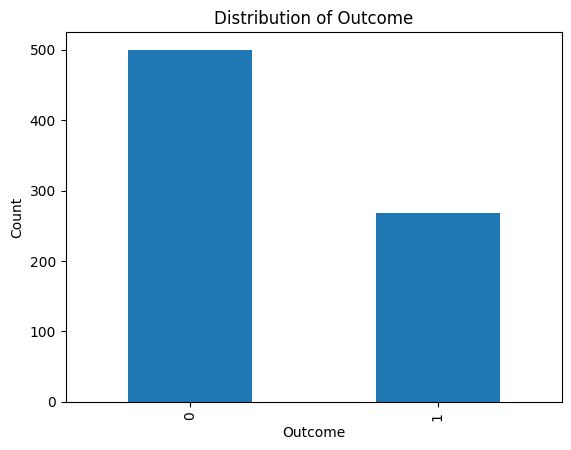

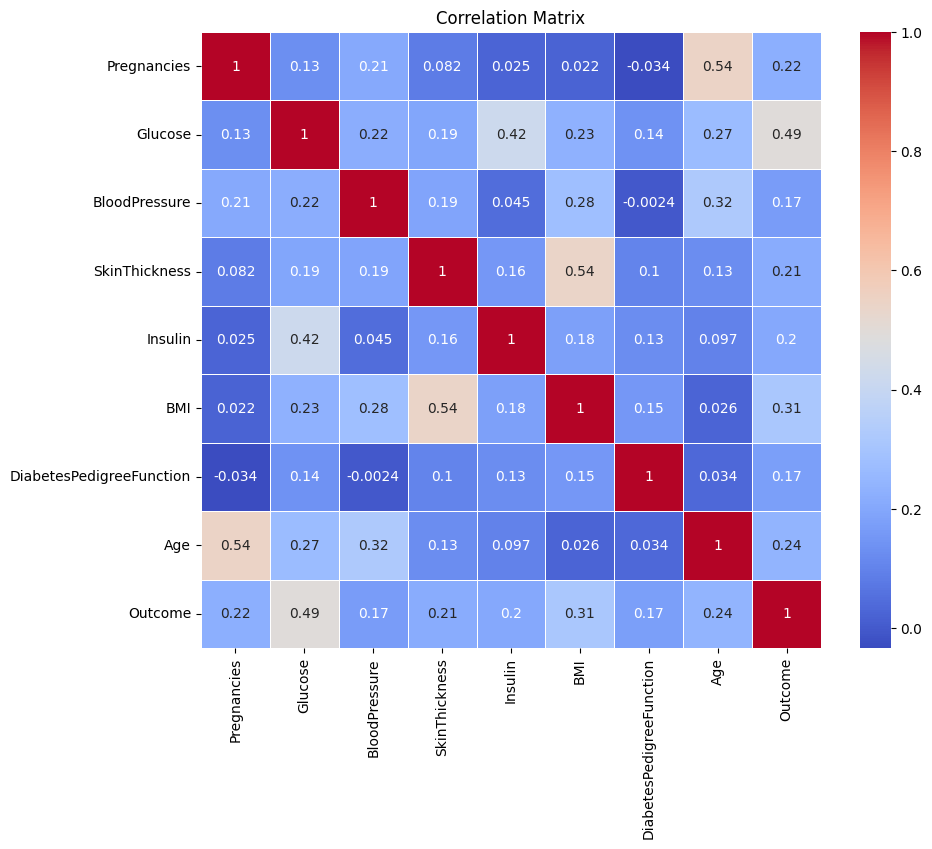

Data preparation complete!


In [1]:
%run data_preparation.ipynb

## GLM Model

In [2]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [3]:
#Add a constant column for the intercept
X_train_glm = sm.add_constant(X_train)
X_test_glm = sm.add_constant(X_test)

In [4]:
#Fit the GLM using training data
glm_model = sm.GLM(y_train, X_train_glm, family=sm.families.Binomial()).fit()

In [5]:
#Print model summary
print("GLM Model Summary:")
print(glm_model.summary())

GLM Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  614
Model:                            GLM   Df Residuals:                      605
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -283.54
Date:                Tue, 04 Mar 2025   Deviance:                       567.08
Time:                        12:07:55   Pearson chi2:                     566.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3075
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const

In [6]:
#Predict probabilities for test set
y_pred_prob = glm_model.predict(X_test_glm)

In [7]:
#Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

In [8]:
#Calculate model accuracy
glm_accuracy = accuracy_score(y_test, y_pred_binary) * 100
print(f"GLM Model Accuracy: {glm_accuracy:.2f}%")

GLM Model Accuracy: 75.32%


## Decision Tree Model

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [10]:
#Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [11]:
#Create Decision Tree model with random state for reproducibility
dt_model = DecisionTreeClassifier(random_state=42)

In [12]:
#Perform GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search_dt = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [13]:
#Get best estimator from GridSearchCV
dt_model_best = grid_search_dt.best_estimator_

In [14]:
#Predict outcomes for the test set
y_pred_dt = dt_model_best.predict(X_test)

In [15]:
#Calculate model accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt) * 100
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}%")

Decision Tree Accuracy: 79.22%


In [16]:
#Print detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82        99
           1       0.66      0.87      0.75        55

    accuracy                           0.79       154
   macro avg       0.79      0.81      0.79       154
weighted avg       0.82      0.79      0.80       154



In [17]:
#Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Confusion Matrix:
 [[74 25]
 [ 7 48]]


## Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
#Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [0.5, 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [20]:
#Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [21]:
#Perform GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': [0.5, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [22]:
#Get the best estimator from GridSearchCV
rf_model_best = grid_search_rf.best_estimator_

In [23]:
#Predict outcomes for the test set
y_pred_rf = rf_model_best.predict(X_test)


In [24]:
#Calculate model accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)* 100
print(f"Random Forest Accuracy: {rf_accuracy :.2f}%")

Random Forest Accuracy: 94.81%


In [25]:
#Print detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        99
           1       0.96      0.89      0.92        55

    accuracy                           0.95       154
   macro avg       0.95      0.94      0.94       154
weighted avg       0.95      0.95      0.95       154



In [26]:
#Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
 [[97  2]
 [ 6 49]]


## Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [28]:
#Hyperparameter tuning
def generate_logistic_params():     #Generate compatible parameter combinations for Logistic Regression.
    params = []
    C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

    # l2 penalty with lbfgs
    for c in C_values:
        params.append({'penalty': ['l2'], 'C': [c], 'solver': ['lbfgs']})

    # l1 penalty with liblinear
    for c in C_values:
        params.append({'penalty': ['l1'], 'C': [c], 'solver': ['liblinear']})

    return params

In [29]:
#Create a Logistic Regression model 
lr_model = LogisticRegression(random_state=42, max_iter=1000)

In [30]:
#Generate parameter grid
param_grid = generate_logistic_params()

In [31]:
#Perform GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search_lr = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search_lr.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid=[{'C': [0.001], 'penalty': ['l2'], 'solver': ['lbfgs']},
                         {'C': [0.01], 'penalty': ['l2'], 'solver': ['lbfgs']},
                         {'C': [0.1], 'penalty': ['l2'], 'solver': ['lbfgs']},
                         {'C': [1], 'penalty': ['l2'], 'solver': ['lbfgs']},
                         {'C': [10], 'penalty': ['l2'], 'solver': ['lbfgs']},
                         {'C': [100], 'penalty'...
                          'solver': ['liblinear']},
                         {'C': [0.01], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [0.1], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [1], 'penalty': ['l1'], 'solver': ['liblinear']},
                         {'C': [10], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [100], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [1000], 'penalty': ['l1'],
                          'solver': ['liblinear']}],
             scoring='accuracy')

In [32]:
#Get the best estimator from GridSearchCV
lr_model_best = grid_search_lr.best_estimator_

In [33]:
#Predict outcomes for test set using the best model
y_pred_lr = lr_model_best.predict(X_test)

In [34]:
#Calculate model accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr) * 100
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}%")

Logistic Regression Accuracy: 77.27%


In [35]:
#Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [36]:
#Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Confusion Matrix:
 [[85 14]
 [21 34]]


## Model Comparison (Recall, Accuracy, F1 scores)

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import recall_score, f1_score

In [38]:
def calculate_metrics(y_true, y_pred):
    #Calculate recall and F1-score.
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return recall * 100, f1 * 100  #Return percentages

In [39]:
#Calculate metrics for each model
metrics = {
    "GLM": {
        "Accuracy": glm_accuracy,
        "Recall": calculate_metrics(y_test, (y_pred_prob > 0.5).astype(int))[0], #calculate recall
        "F1-Score": calculate_metrics(y_test, (y_pred_prob > 0.5).astype(int))[1], #calculate f1
    },
    "Decision Tree": {
        "Accuracy": dt_accuracy,
        "Recall": calculate_metrics(y_test, y_pred_dt)[0], #calculate recall
        "F1-Score": calculate_metrics(y_test, y_pred_dt)[1], #calculate f1
    },
    "Random Forest": {
        "Accuracy": rf_accuracy,
        "Recall": calculate_metrics(y_test, y_pred_rf)[0], #calculate recall
        "F1-Score": calculate_metrics(y_test, y_pred_rf)[1], #calculate f1
    },
    "Logistic Regression": {
        "Accuracy": lr_accuracy,
        "Recall": calculate_metrics(y_test, y_pred_lr)[0], #calculate recall
        "F1-Score": calculate_metrics(y_test, y_pred_lr)[1], #calculate f1
    },
}

In [40]:
#populate the f1 score.
for model, values in metrics.items():
    recall, f1_score = values['Recall'], values['F1-Score']
    values['F1-Score'] = f1_score #assign f1
    values['Recall'] = recall #reassign recall.

In [41]:
#Prepare data for line plot
models = list(metrics.keys())
metric_names = list(metrics["GLM"].keys())

In [42]:
#Extract data for each model and metric
model_data = {}
for model in models:
    model_data[model] = [metrics[model][metric] for metric in metric_names]

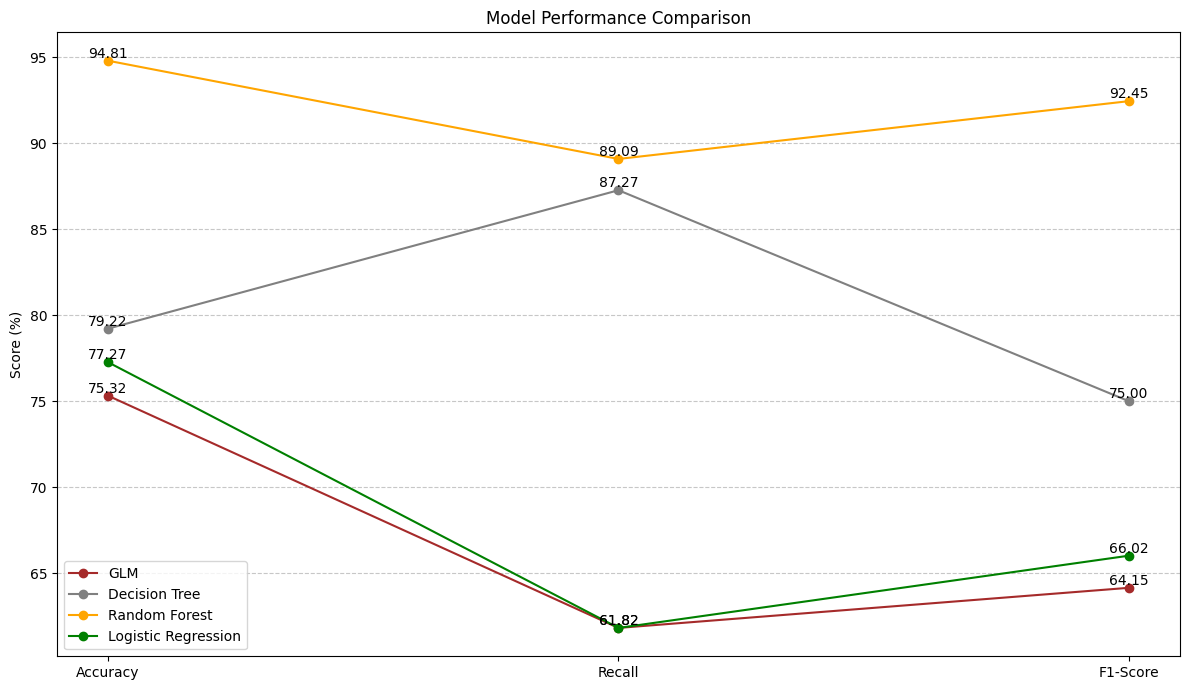

In [43]:
#Plotting
fig, ax = plt.subplots(figsize=(12, 7))

#Define colors for each model
colors = ['brown', 'grey', 'orange', 'green']  

#Plot lines for each model
for i, model in enumerate(models):
    ax.plot(metric_names, model_data[model], marker='o', label=model, color=colors[i])

    # Add data point labels
    for j, val in enumerate(model_data[model]):
        ax.text(metric_names[j], val, f'{val:.2f}', ha='center', va='bottom')

ax.set_ylabel('Score (%)')
ax.set_title('Model Performance Comparison')
ax.set_xticks(metric_names)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()